<a href="https://colab.research.google.com/github/mrunalkavade/Prediction-of-Student-Depression-Using-Machine-Learning/blob/main/Student_Depression_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ Model Trained Successfully!
Accuracy: 0.8440860215053764

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.84      5580
weighted avg       0.84      0.84      0.84      5580

Confusion Matrix:
 [[1822  526]
 [ 344 2888]]


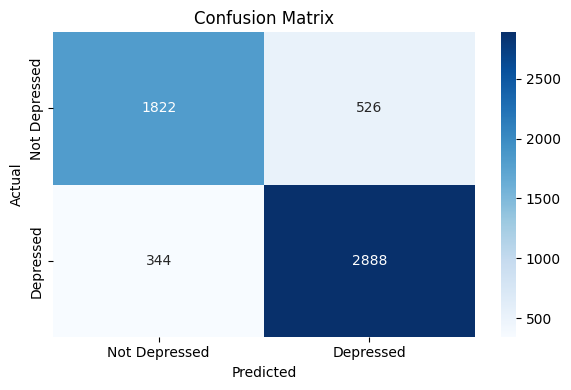

/tmp/ipython-input-2-2997905900.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


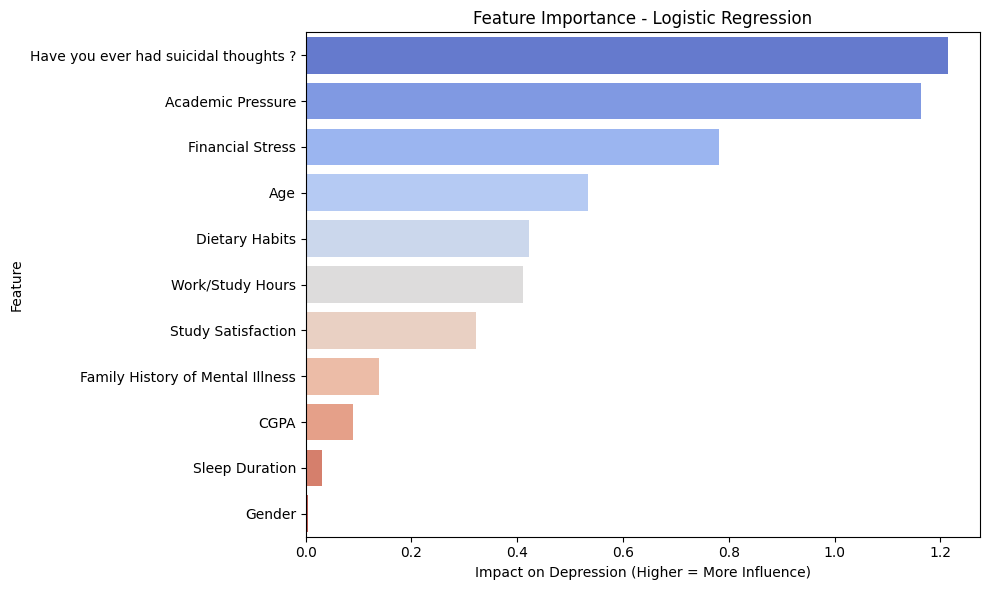

/tmp/ipython-input-2-2997905900.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Depression", data=df, palette="Set2")


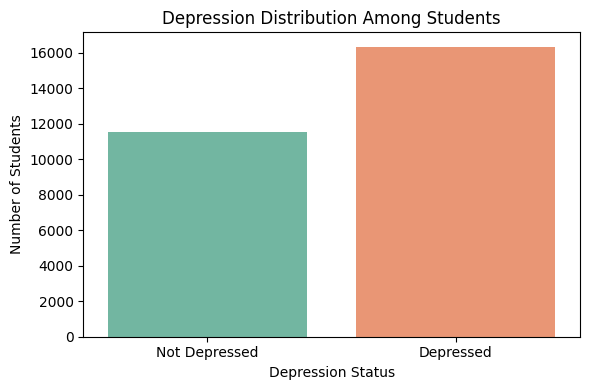


🔍 Enter the following details (case doesn't matter):
Gender (male/female): male
Age: 20
Academic Pressure (0 to 5): 3
Financial Stress (1 to 5): 2
CGPA (e.g., 7.5): 8.9
Study Satisfaction (0 to 5): 4
Family History of Mental Illness (yes/no): yes
Sleep Duration (e.g., less than 5 hours, 5-6 hours, 7-8 hours): 7
Dietary Habits (healthy/moderate/unhealthy): unhealthy
Have you ever had suicidal thoughts? (yes/no): yes
Work/Study Hours per day (0 to 12): 7

🔮 PREDICTION RESULT:
⚠️ The student is likely experiencing **depression**.
🧠 Confidence Level: 85.91%


In [2]:
# === 0. Import Libraries ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1. Load & Clean Dataset ===
df = pd.read_csv("/content/Student Depression Dataset.csv")

# Drop unnecessary columns
df.drop(columns=["id", "City", "Profession", "Degree"], inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Encode categorical columns
categorical_cols = [
    "Gender",
    "Sleep Duration",
    "Dietary Habits",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness"
]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str).str.lower())
    label_encoders[col] = le

# === 2. Define Features and Target ===
target = "Depression"
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]

# === 3. Split and Scale ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 4. Train Logistic Regression Model ===
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# === 5. Evaluate ===
y_pred = model.predict(X_test_scaled)

print("\n✅ Model Trained Successfully!")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# === 6. Confusion Matrix Plot ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === 7. Feature Importance Plot ===
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': np.abs(coefficients)
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance - Logistic Regression")
plt.xlabel("Impact on Depression (Higher = More Influence)")
plt.tight_layout()
plt.show()

# === 8. Depression Distribution Countplot ===
plt.figure(figsize=(6, 4))
sns.countplot(x="Depression", data=df, palette="Set2")
plt.title("Depression Distribution Among Students")
plt.xticks([0, 1], ["Not Depressed", "Depressed"])
plt.xlabel("Depression Status")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# === 9. Predict from User Input ===
def get_user_input():
    print("\n🔍 Enter the following details (case doesn't matter):")
    Gender = input("Gender (male/female): ").strip().lower()
    Age = int(input("Age: "))
    Academic_Pressure = int(input("Academic Pressure (0 to 5): "))
    Financial_Stress = int(input("Financial Stress (1 to 5): "))
    CGPA = float(input("CGPA (e.g., 7.5): "))
    Study_Satisfaction = int(input("Study Satisfaction (0 to 5): "))
    Family_History = input("Family History of Mental Illness (yes/no): ").strip().lower()
    Sleep_Duration = input("Sleep Duration (e.g., less than 5 hours, 5-6 hours, 7-8 hours): ").strip().lower()
    Dietary_Habits = input("Dietary Habits (healthy/moderate/unhealthy): ").strip().lower()
    Suicidal_Thoughts = input("Have you ever had suicidal thoughts? (yes/no): ").strip().lower()
    Work_Study_Hours = int(input("Work/Study Hours per day (0 to 12): "))

    return pd.DataFrame([{
        "Gender": Gender,
        "Age": Age,
        "Academic Pressure": Academic_Pressure,
        "Financial Stress": Financial_Stress,
        "CGPA": CGPA,
        "Study Satisfaction": Study_Satisfaction,
        "Family History of Mental Illness": Family_History,
        "Sleep Duration": Sleep_Duration,
        "Dietary Habits": Dietary_Habits,
        "Have you ever had suicidal thoughts ?": Suicidal_Thoughts,
        "Work/Study Hours": Work_Study_Hours
    }])

# === 10. Make Prediction from Input ===
user_df = get_user_input()

# Preprocess user input
for col in categorical_cols:
    user_df[col] = user_df[col].astype(str).str.lower()
    encoder = label_encoders[col]
    val = user_df[col].iloc[0]
    if val not in encoder.classes_:
        encoder.classes_ = np.append(encoder.classes_, val)  # Adds unknown value
    user_df[col] = encoder.transform(user_df[col])

# Align columns
user_df = user_df[features]

# Scale input
user_scaled = scaler.transform(user_df)

# Predict
prediction = model.predict(user_scaled)[0]
probability = model.predict_proba(user_scaled)[0][1]

# === 11. Output Result ===
print("\n🔮 PREDICTION RESULT:")
if prediction == 1:
    print("⚠️ The student is likely experiencing **depression**.")
else:
    print("✅ The student is likely **not** experiencing depression.")
print(f"🧠 Confidence Level: {probability:.2%}")
